In [1]:
import pandas as pd
import numpy as np

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [2]:
import csv
import sqlite3

con = sqlite3.connect("../db.sqlite3")
cur = con.cursor()

query = """
SELECT
    restaurant_orderitem.quantity,
    restaurant_product.name,
    restaurant_product.price,
    restaurant_order.datetime
FROM
    restaurant_orderitem
JOIN
    restaurant_product ON restaurant_orderitem.product_id = restaurant_product.id
JOIN
    restaurant_order ON restaurant_orderitem.order_id = restaurant_order.id
"""

cur.execute(query)
rows = cur.fetchall()

column_names = [description[0] for description in cur.description]

csv_file = "restaurant_data.csv"

with open(csv_file, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(column_names)
    writer.writerows(rows)

con.close()

df = pd.read_csv("restaurant_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74818 entries, 0 to 74817
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   quantity  74818 non-null  int64  
 1   name      74818 non-null  object 
 2   price     74818 non-null  float64
 3   datetime  74818 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

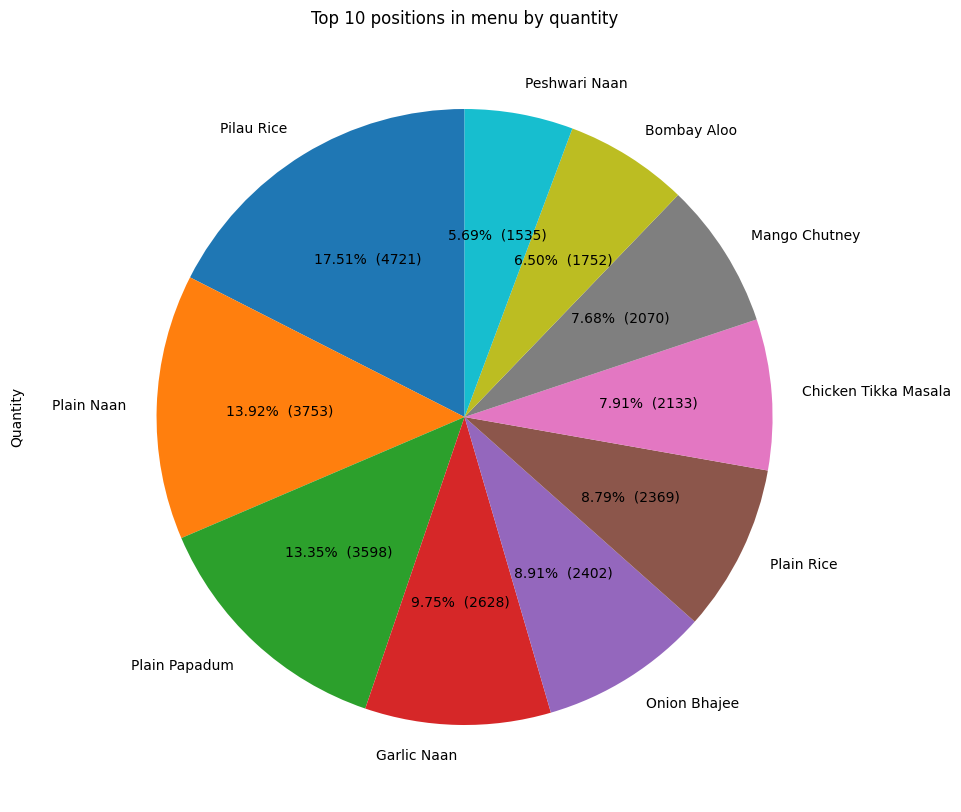

In [3]:
import matplotlib.pyplot as plt

popular_products_by_quantity = df.groupby("name")["quantity"].count().sort_values(ascending=False)[:10]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return "{p:.2f}%  ({v:d})".format(p=pct,v=val)
    return my_autopct

plt.figure(figsize=(12, 10))
plt.pie(popular_products_by_quantity, startangle=90, autopct=make_autopct(popular_products_by_quantity), labels=popular_products_by_quantity.index)
plt.title("Top 10 positions in menu by quantity")
plt.ylabel("Quantity", labelpad=40)
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

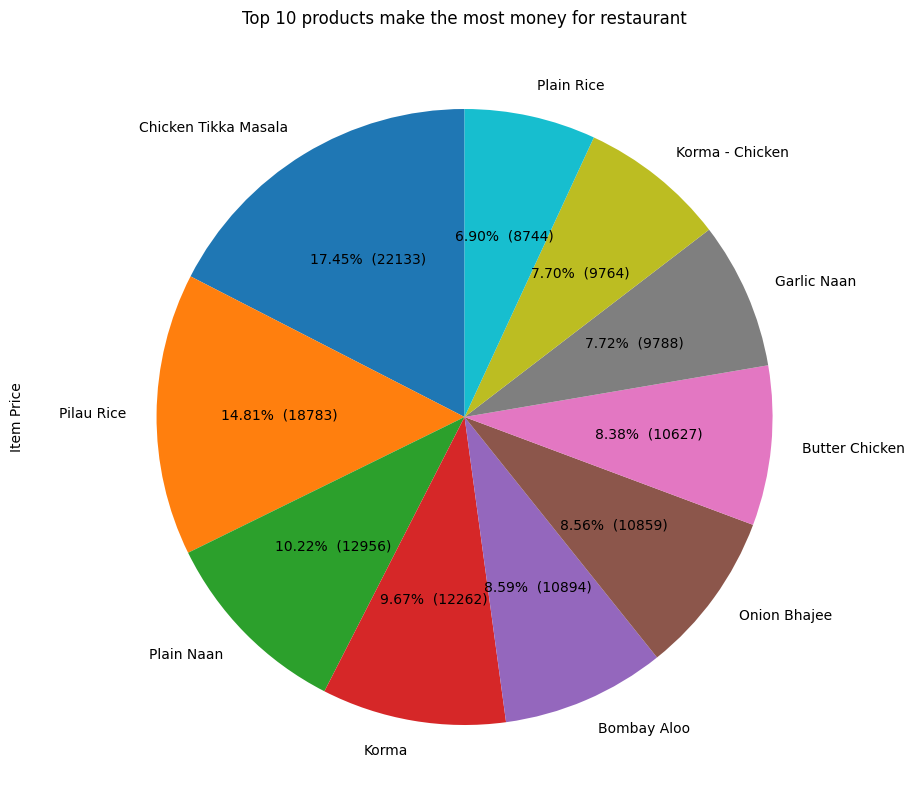

In [4]:
df["item price"] = df["price"] * df["quantity"]
products_money = df.groupby("name")["item price"].sum().sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 10))
plt.pie(products_money, startangle=90, autopct=make_autopct(products_money), labels=products_money.index)
plt.title("Top 10 products make the most money for restaurant")
plt.ylabel("Item Price", labelpad=40)
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

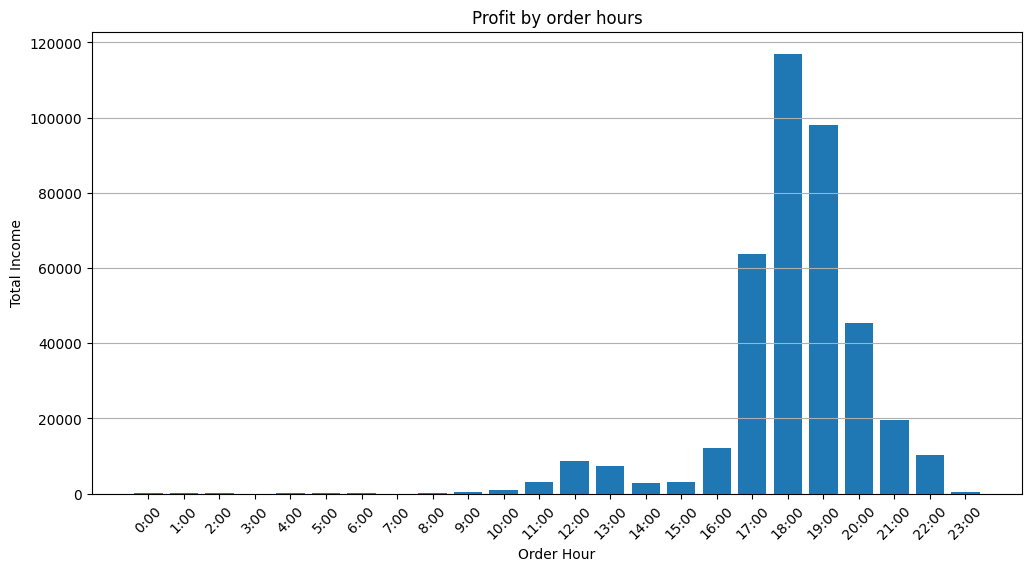

In [5]:
df["datetime"] = pd.to_datetime(df["datetime"])
df["order hour"] = df["datetime"].dt.hour
hour_order_price = df.groupby("order hour")["price"].sum()

plt.figure(figsize=(12, 6))
plt.bar(hour_order_price.index, hour_order_price)

plt.xticks(ticks=range(24), labels=[f'{i}:00' for i in range(24)], rotation=45)

plt.title("Profit by order hours")
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.grid(axis="y")
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

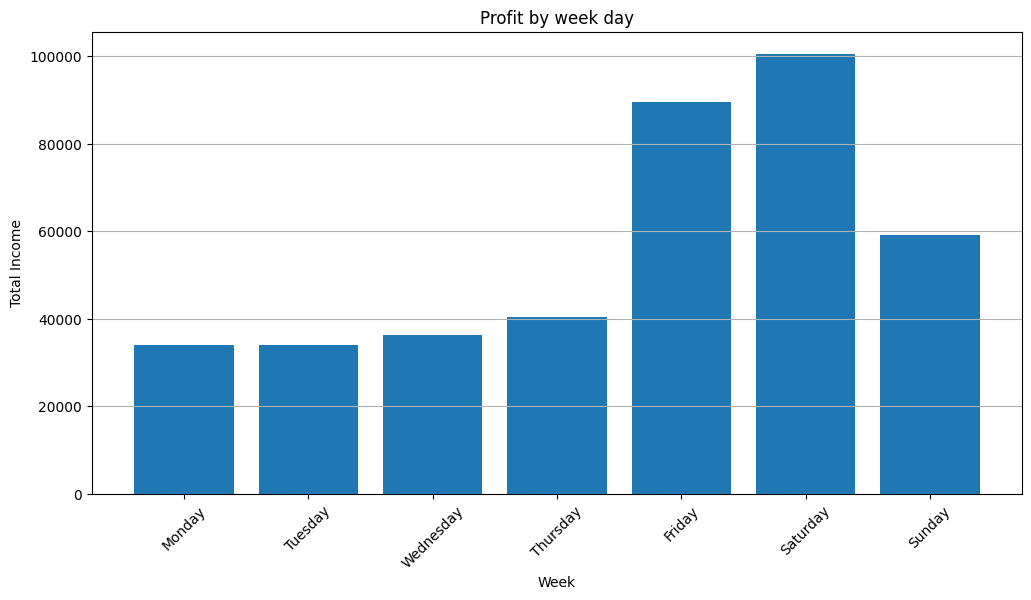

In [6]:
df["day of week"] = df["datetime"].dt.dayofweek
income_by_day = df.groupby("day of week")["price"].sum()

df_income_by_day = income_by_day.reset_index()
df_income_by_day.columns = ['day of week', 'price']
#
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

df_income_by_day['day of week'] = df_income_by_day['day of week'].map(day_mapping)


plt.figure(figsize=(12, 6))
plt.bar(df_income_by_day["day of week"], df_income_by_day["price"])

plt.xticks(ticks=range(7), rotation=45)

plt.title("Profit by week day")
plt.xlabel("Week")
plt.ylabel("Total Income")
plt.grid(axis="y")
plt.show()
